In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import normalize
boston_dataset = load_boston()

temp = normalize(boston_dataset.data)
dataset = pd.DataFrame(temp, columns=boston_dataset.feature_names)
print(dataset)
dataset['Y'] = boston_dataset.target
dataset.head()
print(dataset.shape)


         CRIM        ZN     INDUS  CHAS  ...       TAX   PTRATIO         B     LSTAT
0    0.000013  0.035997  0.004620   0.0  ...  0.591945  0.030597  0.793727  0.009959
1    0.000058  0.000000  0.014977   0.0  ...  0.512648  0.037707  0.840785  0.019362
2    0.000059  0.000000  0.015174   0.0  ...  0.519409  0.038204  0.843138  0.008650
3    0.000071  0.000000  0.004785   0.0  ...  0.487268  0.041045  0.866174  0.006453
4    0.000151  0.000000  0.004755   0.0  ...  0.484177  0.040784  0.865631  0.011625
..        ...       ...       ...   ...  ...       ...       ...       ...       ...
501  0.000130  0.000000  0.024679   0.0  ...  0.564735  0.043441  0.810881  0.020004
502  0.000093  0.000000  0.024421   0.0  ...  0.558831  0.042987  0.812455  0.018587
503  0.000124  0.000000  0.024301   0.0  ...  0.556091  0.042776  0.808470  0.011488
504  0.000225  0.000000  0.024455   0.0  ...  0.559613  0.043047  0.806519  0.013283
505  0.000097  0.000000  0.024389   0.0  ...  0.558101  0.042931 

In [ ]:
# def normalize(df):
#     result = df.copy()
#     for feature_name in df.columns:
#         max_value = df[feature_name].max()
#         min_value = df[feature_name].min()
#         result[feature_name] = (df[feature_name] / max_value) * 100
#     return result

In [ ]:

n = dataset.shape[1]
dataset.insert(loc=0, column='X_0', value=[1 for i in range(dataset.shape[0])])

In [ ]:
train_ds = dataset.sample(frac=0.3)
print(train_ds.shape)
valid_ds = dataset.drop(train_ds.index).sample(frac=1/7)
print(valid_ds.shape)
test_ds = dataset.drop(train_ds.index).drop(valid_ds.index)
print(test_ds.shape)

(152, 15)
(51, 15)
(303, 15)


In [ ]:
alpha_list = [0.1, 0.01, 0.02, 0.03, 0.001]
rho_list = [0.5, 0.6, 0.7, 0.8, 0.9]
epoch_list = [10, 20, 30, 40 ,50]

In [ ]:
def hypothesis(w, x): 
  return (w*x).sum()

In [ ]:
def get_mse(h_x, y):
  return ((h_x-y)*(h_x-y)).sum()/(y.shape[0]*2)

In [ ]:
np.random.seed(42)

In [ ]:
def linear_regression(inp, out, hyper_i):
  alpha, rho, epoch = alpha_list[hyper_i], rho_list[hyper_i], epoch_list[hyper_i]
  m = inp.shape[0]
  inp = inp.to_numpy()
  out = out.to_numpy()
  np.random.seed(42)
  w = np.random.rand(n) # initilalization
  h_x = [hypothesis(w, inp[i, :]) for i in range(m)]  
  # print('initial w:')
  # print(w)
  mse = get_mse(h_x, out)
  mse_list = [mse]
  itr = 1
  while(True):
    new_w = [0 for i in range(n)]
    for j in range(n):
      # wj = wj - alpha*(summation)/m
      summation = 0
      for i in range(m):
        summation += (h_x[i] - out[i]) * inp[i,j]
      new_w[j] = w[j] - alpha * summation / m
    h_x = [hypothesis(new_w, inp[i, :]) for i in range(m)]  
    new_mse = get_mse(h_x, out)
    # print(abs(new_mse - mse))
    if abs(new_mse - mse) <= rho:
      break
    w = new_w
    mse = new_mse
    # print(new_mse)
    mse_list.append(new_mse)
    # if(mse >= 234243242323434):
    #   break
    if(itr > epoch): 
      break
    itr += 1
  # print('ecochs: ', itr)
  return mse_list

In [ ]:
for i in range(5):
  print("for validation sample, mse = ", linear_regression(valid_ds.iloc[:, :-1], valid_ds.iloc[:, -1], i)[-1])
  
# print("for test sample, mse = ", linear_regression(test_ds.iloc[:, :-1], test_ds.iloc[:, -1], alpha)[-1])

for validation sample, mse =  34.71768891738782
for validation sample, mse =  119.0014678936685
for validation sample, mse =  50.627415718562524
for validation sample, mse =  39.47753948618364
for validation sample, mse =  225.7326858609677


In [ ]:
# best one: for i = 0
best_i = 0
print("for training samples, mse = ", linear_regression(train_ds.iloc[:, :-1], train_ds.iloc[:, -1], 0)[-1])
print("for test samples, mse = ", linear_regression(test_ds.iloc[:, :-1], test_ds.iloc[:, -1], 0)[-1])
print("for validation samples, mse = ", linear_regression(valid_ds.iloc[:, :-1], valid_ds.iloc[:, -1], 0)[-1])

for training samples, mse =  40.73932015125184
for test samples, mse =  42.24886858720034
for validation samples, mse =  34.71768891738782


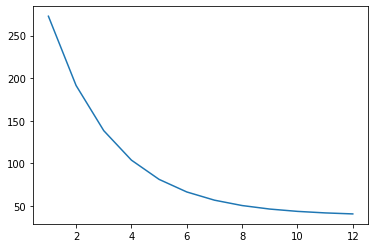

In [ ]:
train_result = linear_regression(train_ds.iloc[:, :-1], train_ds.iloc[:, -1], 0)
epoch = [(i+1) for i in range(len(train_result))]
plt.plot(epoch, train_result)
plt.show()